In [37]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def score(ytrue,ypred):
    acc=accuracy_score(ytrue,ypred)
    rs=recall_score(ytrue,ypred)
    ps=f1_score(ytrue,ypred)
    f1=f1_score(ytrue,ypred)
    print(f"accuracy_score: {acc}\nprecision score: {ps}\nrecall score: {rs}\nf1score: {f1}")

In [4]:
data=pd.read_csv("../data/raw/heart_failure_clinical_records_dataset.csv")

In [41]:
x=data.iloc[:,:-1]
y=data['DEATH_EVENT']

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [53]:
model=HistGradientBoostingClassifier(max_depth=20)
model.fit(xtrain,ytrain)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,20
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [54]:
ypred=model.predict(xtest)

In [55]:
score(ytest,ypred)

accuracy_score: 0.75
precision score: 0.6341463414634146
recall score: 0.52
f1score: 0.6341463414634146


Classification Metrics
------------------------------
Accuracy : 0.7500
Precision: 0.8125
Recall   : 0.5200
F1 Score : 0.6341


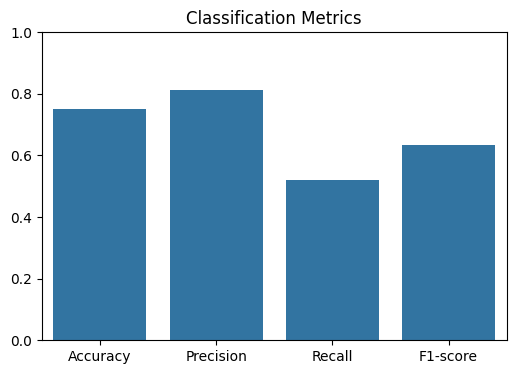

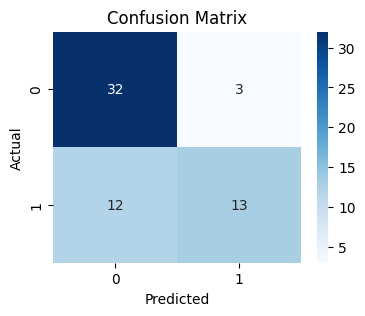

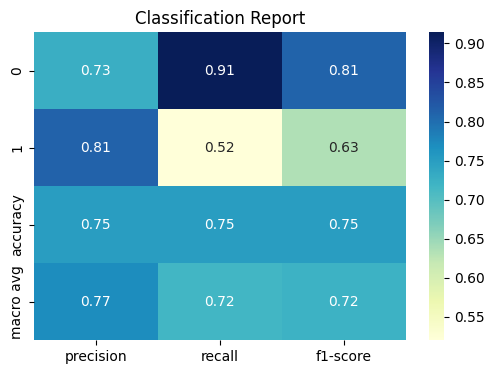

In [56]:
evaluate_classification(ytest,ypred)

In [38]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

def evaluate_classification(ytrue, ypred):
    # ---------- Metrics ----------
    acc = accuracy_score(ytrue, ypred)
    prec = precision_score(ytrue, ypred, average='binary')
    rec = recall_score(ytrue, ypred, average='binary')
    f1 = f1_score(ytrue, ypred, average='binary')

    print("Classification Metrics")
    print("-" * 30)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    # ---------- Bar Plot ----------
    metrics = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title("Classification Metrics")
    plt.ylim(0, 1)
    plt.show()

    # ---------- Confusion Matrix ----------
    cm = confusion_matrix(ytrue, ypred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # ---------- Classification Report Heatmap ----------
    report = classification_report(ytrue, ypred, output_dict=True)
    report_df = (
        sns.load_dataset("tips")  # dummy to initialize pandas dependency safely
    )

    report_df = (
        __import__("pandas")
        .DataFrame(report)
        .transpose()
        .iloc[:-1, :-1]
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Classification Report")
    plt.show()